In [13]:
''' Import packages. '''
# Time packages
import calendar, cftime, datetime, time
# Numerical analysis packages
import numpy as np, random, scipy, numba
# Local data storage packages
import functools, importlib, os, pickle, collections, sys
import pandas as pd, xarray as xr, nc_time_axis
xr.set_options(keep_attrs=True)
# Visualization tools
import cartopy, cartopy.crs as ccrs, matplotlib, matplotlib.pyplot as plt

# Local imports
import moc, zonal_mean
importlib.reload(zonal_mean);
importlib.reload(moc);

In [2]:
importlib.reload(zonal_mean);

model_names = ['AM2.5', 'HIRAM']
experiment_names = ['CONST', '0N', '15N', 'TIMEVAR', 'AMIP']
field_names = ['ucomp', 'vcomp']
data = zonal_mean.load(model_names=model_names, 
                       experiment_names=experiment_names, 
                       field_names=field_names,
                       zonal_average=False,
                       time_average=False,
                       pressure_level=None)

Iterand configuration: CONST; iterand experiment: CTL
Iterand configuration: CONST; iterand experiment: DIFF
Iterand configuration: 0N; iterand experiment: CTL
Iterand configuration: 0N; iterand experiment: DIFF
Iterand configuration: 15N; iterand experiment: CTL
Iterand configuration: 15N; iterand experiment: DIFF
Iterand configuration: TIMEVAR; iterand experiment: CTL
Iterand configuration: TIMEVAR; iterand experiment: DIFF
Iterand configuration: AMIP; iterand experiment: CTL
Iterand configuration: AMIP; iterand experiment: DIFF


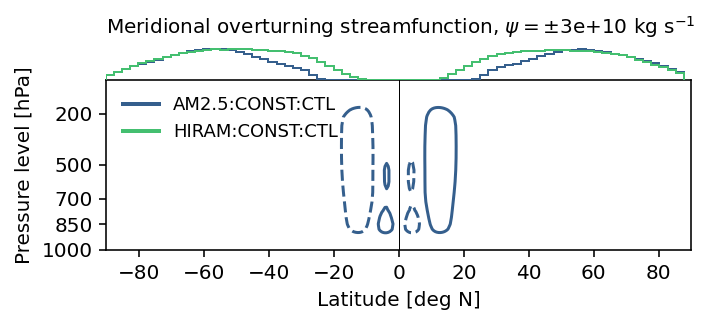

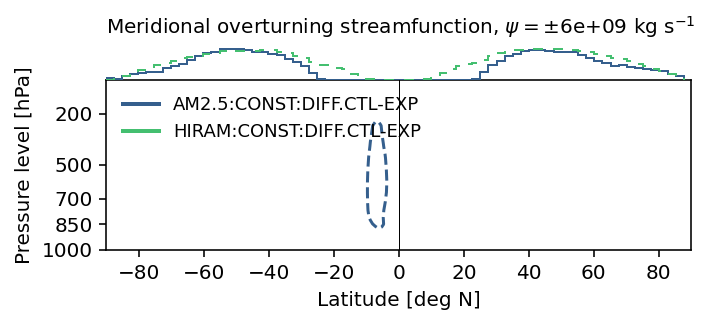

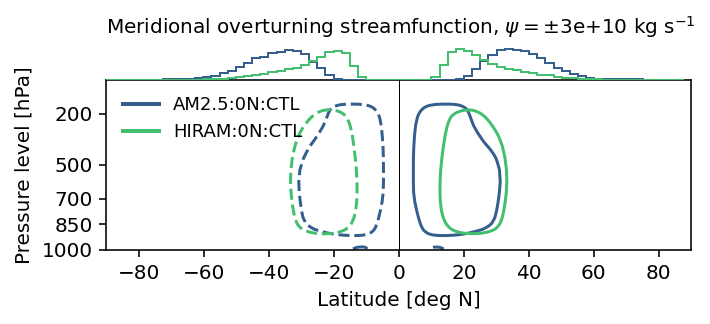

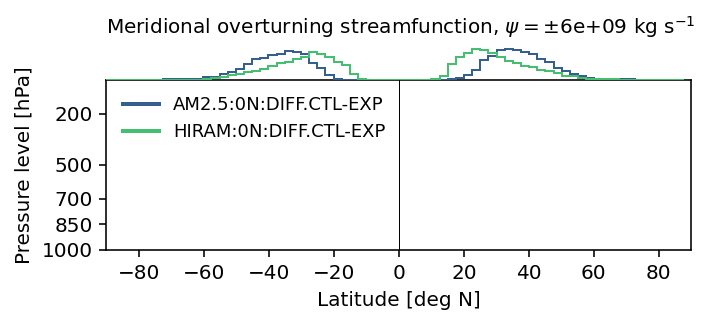

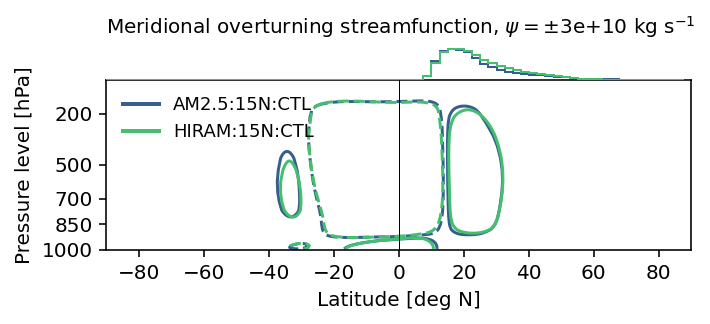

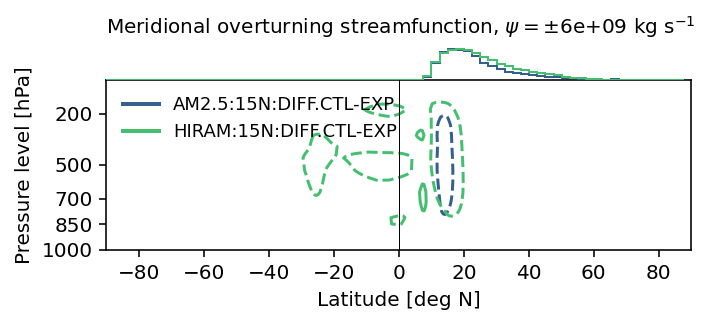

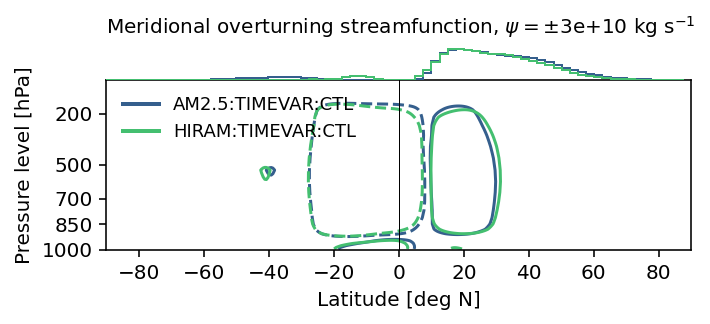

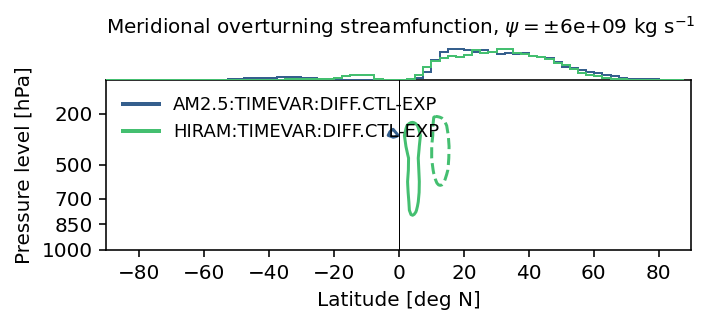

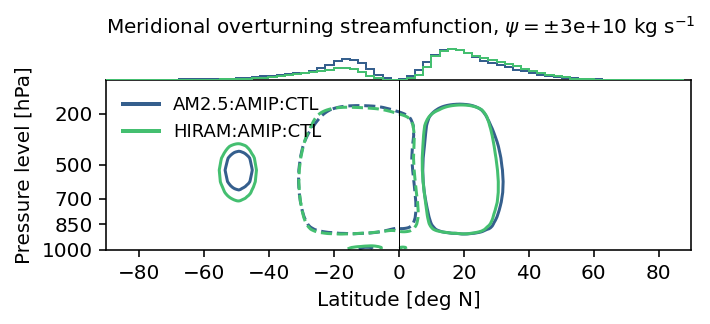

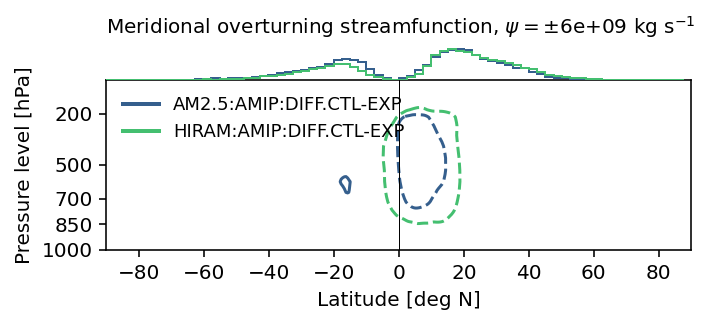

In [21]:
importlib.reload(moc)
importlib.reload(zonal_mean)

for config_type in experiment_names:
    for experiment_type in ['CTL', 'DIFF']:

        print(f'Iterand configuration: {config_type}; iterand experiment: {experiment_type}')

        # Configurations to analyze
        configs = [config for config in data.keys() if f':{experiment_type}' in config and config_type in config]
        # Contour level magnitude to plot
        psi_magnitude = 30e9 if experiment_type == 'CTL' else 6e9
        # Generate the plot
        moc.multiplot_overturning_circulation(data=data,
                                              configuration_names=configs,
                                              psi_magnitude=psi_magnitude)